In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
summarize)
import statsmodels.api as sm

In [2]:
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
(LinearDiscriminantAnalysis as LDA,
QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
boston_df = load_data("Boston")
boston_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


In [4]:
crim_median = float(boston_df["crim"].median())
y = np.where(boston_df["crim"] >= crim_median, 1, 0)
boston_df["crim01"] = y


### b)

In [5]:
boston_df.drop(columns=["crim01"]).corrwith(boston_df.crim01)

crim       0.409395
zn        -0.436151
indus      0.603260
chas       0.070097
nox        0.723235
rm        -0.156372
age        0.613940
dis       -0.616342
rad        0.619786
tax        0.608741
ptratio    0.253568
lstat      0.453263
medv      -0.263017
dtype: float64

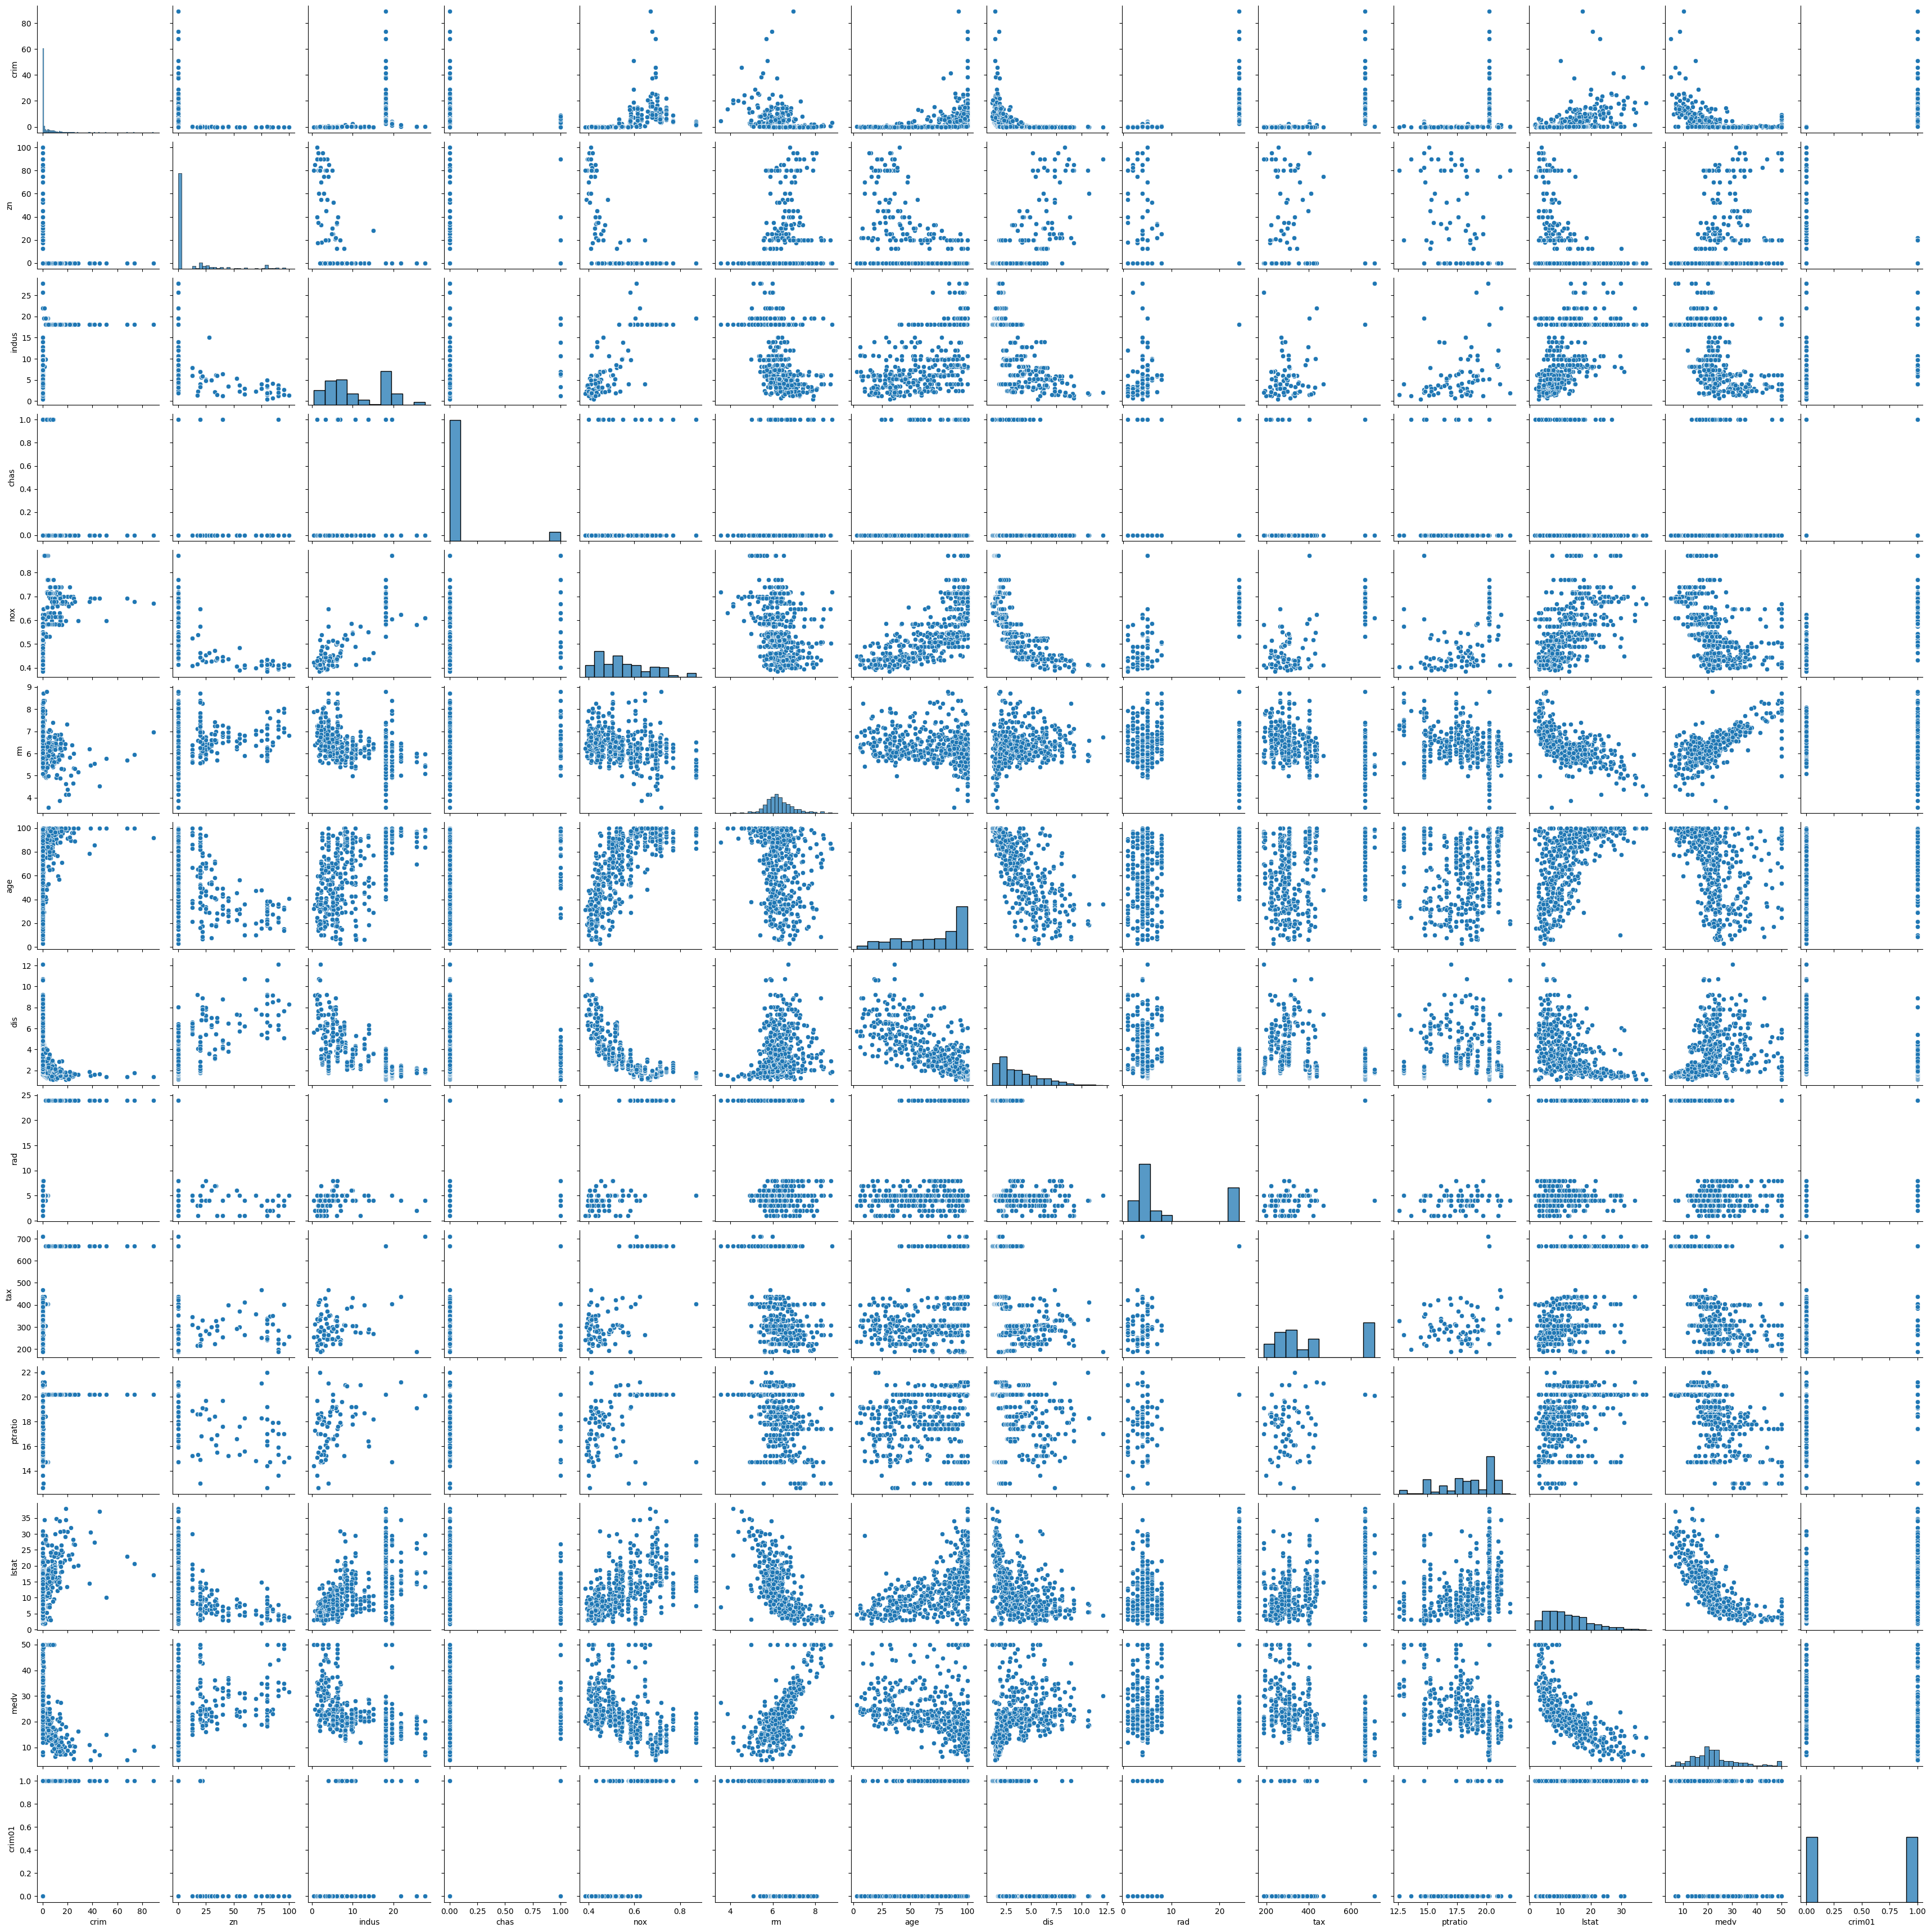

In [6]:
sns.pairplot(boston_df)

In [7]:
X = boston_df.drop(columns=["crim01", "crim"])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
lda = LDA(store_covariance=True)
results = lda.fit(X_train, y_train)

In [9]:
accuracy_score(y_test, results.predict(X_test))

0.8346456692913385

In [10]:
qda = QDA()
results = qda.fit(X=X_train, y=y_train)

In [11]:
accuracy_score(y_test, results.predict(X_test))

0.8740157480314961

In [12]:
glm_train = sm.GLM(y_train, X_train, family=sm.families.Binomial())
results = glm_train.fit()

In [13]:
labels = np.where(probs > .5, 1, 0)
confusion_table(labels, y_test)

NameError: name 'probs' is not defined

In [ ]:
accuracy_score(y_test, labels)

0.8346456692913385

In [ ]:
NB = GaussianNB()
results = NB.fit(X=X_train, y=y_train)

In [ ]:
accuracy_score(y_test, results.predict(X_test))

0.8267716535433071

In [15]:
for k in range(1, 20):
    knn1 = KNeighborsClassifier(n_neighbors=k)
    results = knn1.fit(X=X_train, y=y_train)
    probs = results.predict_proba(X_test)[:, 1]
    labels = np.where(probs > .5, 1, 0)
    error_rate = np.mean(labels != y_test)
    print(f"{k}: {error_rate}")

    if k == 1 or error_rate < best_model_error:
        best_model = results
        best_model_error = error_rate
        best_model_labels = labels

1: 0.10236220472440945
2: 0.08661417322834646
3: 0.07086614173228346
4: 0.09448818897637795
5: 0.12598425196850394
6: 0.10236220472440945
7: 0.11811023622047244
8: 0.11811023622047244
9: 0.11811023622047244
10: 0.11811023622047244
11: 0.11811023622047244
12: 0.11811023622047244
13: 0.12598425196850394
14: 0.12598425196850394
15: 0.13385826771653545
16: 0.13385826771653545
17: 0.14960629921259844
18: 0.14173228346456693
19: 0.14960629921259844


In [16]:
confusion_table(best_model_labels, y_test)

Truth,0,1
Predicted,,
0,63,6
1,3,55


In [17]:
accuracy_score(y_test, best_model_labels)

0.9291338582677166